In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

In [20]:
N = 101
xi = np.linspace(0,1,N)
h = 1/(N-1)
W0 = np.sqrt(1 - xi)
g = 4
v0 = W0[N-2]**2*W0[N-3]/g/2/h
t = 10**(-6)

Text(0, 0.5, 'xi')

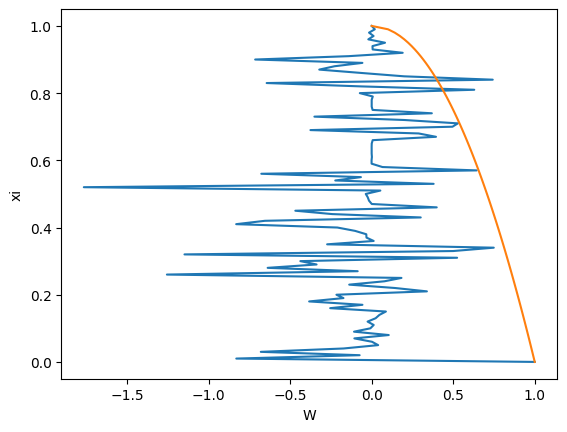

In [22]:
v_prev = v0.copy()
W_prev = W0.copy()
eps = 1
eps_v = 1
gs = []
ts = []

n_t = 10**4
psi0 = np.empty(n_t+1)
psi0[0] = - ((W0[0] + W0[1])/2)**3/g*(-W0[0] + W0[1])/h
t0 = 10**(-3)
time = [t0]

for j in range(n_t):
    # gs.append(g)
    # ts.append(j*t)
    while(eps_v > 10**(-3)):
        while(eps > 10**(-3)):
            
            a1 = np.zeros(N-1)
            a1[1:-1] = - v_prev/g*xi[1:-2]/2/h - 1/(g*h)**2*((W_prev[1:-2] + W_prev[2:-1])/2)**3
            
            a0 = np.ones(N)
            a0[1:-1] = 1/t + 1/(g*h)**2*((W_prev[1:N-1] + W_prev[2:])/2)**3 - 1/(g*h)**2*((W_prev[0:N-2] + W_prev[1:N-1])/2)**3
            
            a_1 = np.zeros(N-1)
            a_1[:-1] = v_prev/g*xi[1:-1]/2/h - 1/(g*h)**2*((W_prev[:-2] + W_prev[1:-1])/2)**3
            
            f = np.zeros(N)
            f[0] = 1
            f[-1] = 0
            f[1:-1] = W_prev[1:-1]/t
            k = [a_1,a0, a1]
            offset = [-1,0,1]
            A = diags(k,offset, format = 'csr')
            W = spsolve(A, f)
            eps = np.sqrt(((W - W_prev)**2).mean())
            W_prev = W.copy()
        v = W_prev[N-2]**2*W_prev[N-3]/g/2/h
        eps_v = np.abs(v - v_prev)
        v_prev = v.copy()
    g = g + v_prev*t
    time.append(time[j] + t)
    psi0[j+1] = - ((W[0] + W[1])/2)**3/g*(-W[0] + W[1])/h

plt.figure()
plt.plot(W_prev, xi)
plt.plot(W0, xi)
plt.xlabel('W')
plt.ylabel('xi')

In [165]:
N = 4
h = 1/(N+1)
xi = np.linspace(h, 1 - h, N)
W0 = np.sqrt(1 - xi)
tau = 10**(-5)
g = 4
v0 = W0[N-1]**2*W0[N-2]/g/2/h

In [166]:
xi

array([0.2, 0.4, 0.6, 0.8])

In [110]:
v0

0.07905694150420944

In [140]:
W0

array([1.        , 0.89442719, 0.77459667, 0.63245553, 0.4472136 ])

In [150]:
# k_{i+1/2}
def K(w):
    k = np.empty(w.shape[0] + 1)
    k[0] = (1 + w[0])/2
    k[-1] = w[-1]/2
    k[1:-1] = (w[:-1] + w[1:])/2
    return k**3

# psi_{k+1/2}
def psi(w, g):
    psi = np.empty(w.shape[0] + 1)
    k = K(w)
    psi[0] = - k[0]*(w[0] - 1)/(h*g)
    psi[-1] = - k[-1]*w[-1]/(h*g)
    psi[1:-1] = - k[1:-1]*(w[2:] - w[1:-1])/(h*g)
    return psi



In [153]:
a = tau/(g*h)**2
b = tau*v/(2*g*h)

k = K(W0)

k0 = 1 + a*(k[1:] - k[:-1])
k1 = -b*xi[:-1] - a*k[1:-1]
k_1 = b*xi[1:] - a*k[:-2]

In [154]:
f = np.ones(N)
f[1:-1] = b*xi[1:-1]*(W0[2:] - W0[:-2]) + a*(k[1:-1]*(W0[2:] - W0[1:-1]) - k[:-2]*(W0[1:-1] - W0[:-2]))
f[-1] = b*xi[-1]*(-W0[-1]) + a*(k[-1]*(-W0[-1]) - k[-2]*(W0[-1] - W0[-2]))

ValueError: operands could not be broadcast together with shapes (4,) (3,) 

In [169]:
a0

array([1.00000000e+00, 9.99999674e+05, 9.99999733e+05, 9.99999796e+05,
       1.00000000e+00])

In [171]:
k0

array([0.99999633, 0.99999716, 0.99999751, 0.99999791, 0.99999799])

In [168]:
N = 5
xi = np.linspace(0,1,N)
h = 1/(N-1)
W0 = np.sqrt(1 - xi)
v_prev = v0.copy()
W_prev = W0.copy()
g = 4
v0 = W0[N-2]**2*W0[N-3]/g/2/h
t = 10**(-6)

a1 = np.zeros(N-1)
a1[1:-1] = - v_prev/g*xi[1:-2]/2/h - 1/(g*h)**2*((W_prev[1:-2] + W_prev[2:-1])/2)**3

a0 = np.ones(N)
a0[1:-1] = 1/t + 1/(g*h)**2*((W_prev[1:N-1] + W_prev[2:])/2)**3 - 1/(g*h)**2*((W_prev[0:N-2] + W_prev[1:N-1])/2)**3

a_1 = np.zeros(N-1)
a_1[:-1] = v_prev/g*xi[1:-1]/2/h - 1/(g*h)**2*((W_prev[:-2] + W_prev[1:-1])/2)**3

In [161]:
xi

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [134]:
W = spsolve(A, f)

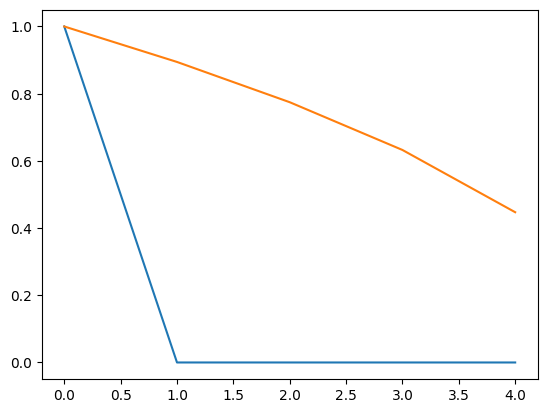

In [142]:
plt.plot(W)
plt.plot(W0)

In [144]:
A.toarray()

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [-1.31801306e-05,  9.99995802e-01, -9.17948662e-06,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -8.88302308e-06,  9.99996360e-01,
        -5.63841613e-06,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -5.14431025e-06,
         9.99997017e-01, -2.75457792e-06],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -2.06282968e-06,  9.99997717e-01]])

In [145]:
f

array([1.00000000e+00, 2.91480743e-07, 2.63006410e-07, 2.20954761e-07,
       2.00444174e-07])